# Machine Learning
This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) using the past 60 days stock price of (Apple Inc)

In [45]:
# Initial imports
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [46]:
# Get the stock data using yahoo source
df = web.DataReader('AAPL', data_source='yahoo', start='2016-01-01', end='2021-01-13')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-01-04,54.799999,53.389999,54.320000,54.799999,53778000.0,50.006744
2016-01-05,55.389999,54.540001,54.930000,55.049999,34079700.0,50.234879
2016-01-06,54.400002,53.639999,54.320000,54.049999,39518900.0,49.322346
2016-01-07,53.490002,52.070000,52.700001,52.169998,56564900.0,47.606789
2016-01-08,53.279999,52.150002,52.369999,52.330002,48754000.0,47.752792
...,...,...,...,...,...,...
2021-01-07,219.339996,213.710007,214.039993,218.289993,27694500.0,218.289993
2021-01-08,220.580002,217.029999,218.679993,219.619995,22949400.0,219.619995
2021-01-11,218.910004,216.729996,218.470001,217.490005,23047000.0,217.490005


In [47]:
# Get the number of rows and columns in the data set
df.shape

(1267, 6)

<function matplotlib.pyplot.show(*args, **kw)>

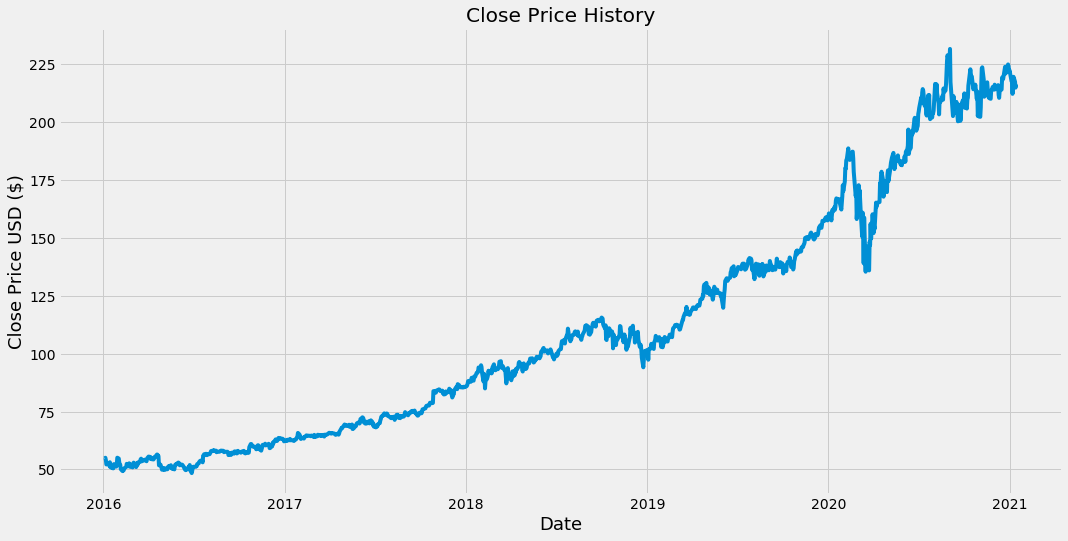

In [48]:
# Visualize the closing price
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show

In [49]:
# Create a new dataframe with only the 'Close Column'
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len

1014

In [50]:
# Scale the Data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.03476694],
       [0.03613142],
       [0.0306735 ],
       ...,
       [0.92271592],
       [0.90874358],
       [0.91643926]])

In [51]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len , :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.03476694, 0.03613142, 0.0306735 , 0.02041261, 0.02128589,
       0.02112214, 0.02374194, 0.01751992, 0.02554307, 0.01397228,
       0.01162537, 0.01288069, 0.01118873, 0.02106757, 0.01833861,
       0.02041261, 0.0152276 , 0.01981225, 0.03634974, 0.03427573,
       0.02494269, 0.02035804, 0.01948477, 0.0094422 , 0.00534876,
       0.00463922, 0.00698613, 0.00687697, 0.01129789, 0.01451807,
       0.02177709, 0.02052177, 0.01850234, 0.02303243, 0.01500928,
       0.01599171, 0.02003056, 0.01566422, 0.01337191, 0.02265037,
       0.0246698 , 0.02139503, 0.0196485 , 0.01419058, 0.01757451,
       0.02406942, 0.01975766, 0.02532474, 0.02587053, 0.02816286,
       0.03231087, 0.03400284, 0.02761708, 0.02963651, 0.03078266,
       0.03023688, 0.03154677, 0.02788997, 0.03427573, 0.03613142])]
[0.037113849333652194]

[array([0.03476694, 0.03613142, 0.0306735 , 0.02041261, 0.02128589,
       0.02112214, 0.02374194, 0.01751992, 0.02554307, 0.01397228,
       0.01162537, 0.01288069, 0.0

In [52]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [53]:
# Reshape the data
x_train.shape

(954, 60)

In [54]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(954, 60, 1)

In [55]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [56]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=9)

Epoch 1/9
954/954 [==============================] - 35s 34ms/step - loss: 0.0016
Epoch 2/9
954/954 [==============================] - 38s 39ms/step - loss: 2.9085e-04
Epoch 3/9
954/954 [==============================] - 37s 39ms/step - loss: 3.1613e-04
Epoch 4/9
954/954 [==============================] - 36s 38ms/step - loss: 2.2288e-04
Epoch 5/9
954/954 [==============================] - 36s 37ms/step - loss: 2.3058e-04
Epoch 6/9
954/954 [==============================] - 35s 37ms/step - loss: 2.0887e-04
Epoch 7/9
954/954 [==============================] - 35s 36ms/step - loss: 1.7991e-04
Epoch 8/9
954/954 [==============================] - 36s 38ms/step - loss: 1.2903e-04
Epoch 9/9
954/954 [==============================] - 34s 36ms/step - loss: 1.8645e-04


In [58]:
# Create the testing data set
# Create a new array containing scaled values from index 1266 to 953
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [59]:
# Conver the data to a numpy array
x_test = np.array(x_test)

In [60]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [61]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [62]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean( predictions - y_test )**2 )
rmse

0.18434106879554718

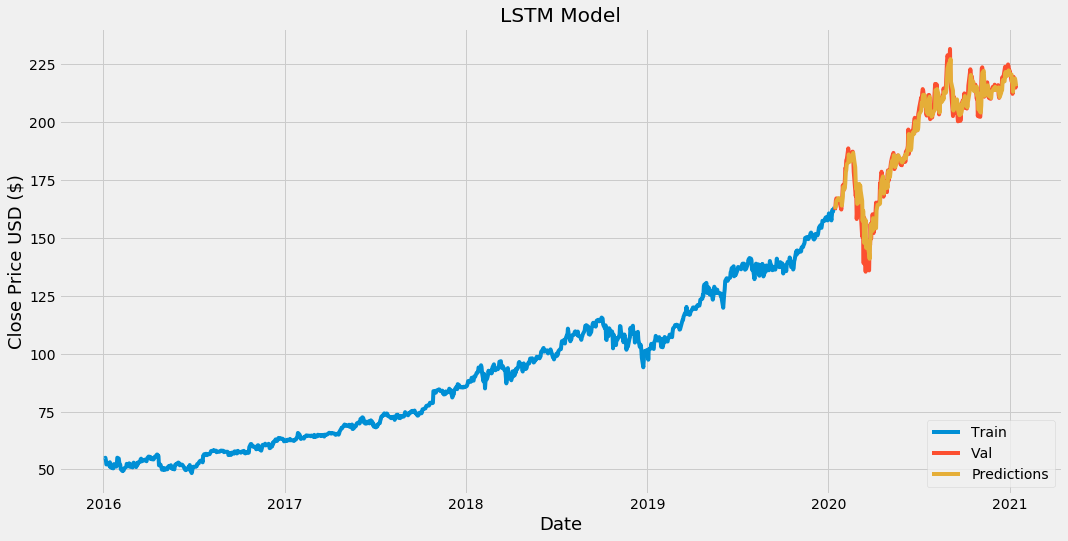

In [63]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('LSTM Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [64]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2020-01-14,162.130005,163.627609
2020-01-15,163.179993,163.183517
2020-01-16,166.169998,163.713455
2020-01-17,167.100006,165.922882
2020-01-21,166.500000,167.204910
...,...,...
2021-01-07,218.289993,213.158524
2021-01-08,219.619995,217.022507
2021-01-11,217.490005,218.898544


In [65]:
# Get the quote
apple_quote = web.DataReader('MSFT', data_source='yahoo', start='2016-01-01', end='2021-01-13')
# Create a new dataframe
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test data set to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# Undo the Scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[216.09503]]
